## INITIAL DATA INTERPRETATION WITH A CHUNK OF DATA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
report= pd.read_csv('From Jan to April.csv',thousands='.',parse_dates=['Time'])


In [12]:
report.sample(5)

,Time,Domain,Opportunities,Format Loads,Format Fill Rate,Impressions,Viewable Impressions,Viewability Measured Impressions,Viewability Rate,Fill Rate,...,Cost,Profit,Revenue,Profit Margin,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
144231,2020-02-29,malltv.com.pa,592,131,9.16%,12,12,12,100.00%,2.03%,...,$0.01158,$0.00772,$0.0193,40.00%,2,16.67%,83.33%,75.00%,58.33%,58.33%
158249,2020-03-06,google.co.jp,0,5,0.00%,0,0,0,NaN,0.00%,...,$0.00,$0.00,$0.00,0.00%,0,0.00%,0.00%,0.00%,0.00%,0.00%
184367,2020-03-17,plantaobrasil.net,"44,387","7,348",1.40%,103,97,103,94.17%,0.23%,...,$0.092,$0.066,$0.158,41.77%,4,3.88%,81.55%,73.79%,66.99%,58.25%
15358,2020-01-07,noticaribe.com.mx,"325,702","41,676",1.31%,546,481,544,88.42%,0.17%,...,$0.382308,$0.573462,$0.95577,60.00%,1,0.18%,81.32%,71.61%,62.82%,55.86%
199522,2020-03-23,pknewspapers.com,0,2,0.00%,0,0,0,NaN,0.00%,...,$0.00,$0.00,$0.00,0.00%,0,0.00%,0.00%,0.00%,0.00%,0.00%


In [13]:
report.shape

(222676, 22)

In [14]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222676 entries, 0 to 222675
Data columns (total 22 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Time                              222676 non-null  datetime64[ns]
 1   Domain                            222584 non-null  object        
 2   Opportunities                     222676 non-null  object        
 3   Format Loads                      216957 non-null  object        
 4   Format Fill Rate                  216957 non-null  object        
 5   Impressions                       222676 non-null  object        
 6   Viewable Impressions              222676 non-null  object        
 7   Viewability Measured Impressions  222676 non-null  object        
 8   Viewability Rate                  107428 non-null  object        
 9   Fill Rate                         222676 non-null  object        
 10  Efficiency Rate                 

In [15]:
report.drop(['Opportunities','Viewable Impressions','Viewability Measured Impressions','Fill Rate','Profit','Revenue','Profit Margin'],axis=1, inplace=True)


In [16]:
# NANS values
report = report.fillna(0)

Converting numeric columns with ' , ' into integers

In [17]:
report['Format Loads'] = report['Format Loads'].str.replace(",", "").astype(float)
report['Impressions'] = report['Impressions'].str.replace(",", "").astype(int)
report['Clicks'] = report['Clicks'].str.replace(",", "").astype(int)


Converting columns with '%' , '$' and ',' into floats

In [18]:
report['Format Fill Rate'] = report['Format Fill Rate'].str.replace("%", "").astype(float)
report['Viewability Rate'] = report['Viewability Rate'].str.replace("%", "").astype(float).fillna(0)
report['Efficiency Rate'] = report['Efficiency Rate'].str.replace("%", "").astype(float)
report['CPM'] = report['CPM'].str.replace("$", "").astype(float)
report['Cost'] = report['Cost'].map(lambda x: x[1:]).str.replace(",", "").astype(float)
report['CTR'] = report['CTR'].str.replace("%", "").astype(float)
report['25% View Rate'] = report['25% View Rate'].str.replace("%", "").astype(float)
report['50% View Rate'] = report['50% View Rate'].str.replace("%", "").astype(float)
report['75% View Rate'] = report['75% View Rate'].str.replace("%", "").astype(float)
report['100% View Rate'] = report['100% View Rate'].str.replace("%", "").astype(float)

In [19]:
report.head()

,Time,Domain,Format Loads,Format Fill Rate,Impressions,Viewability Rate,Efficiency Rate,CPM,Cost,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
0,2020-01-01,onlymyhealth.com,332.0,38.25,127,90.48,100.0,1.72,0.15316,2,1.57,92.91,91.34,85.04,79.53
1,2020-01-01,naatly.se,234.0,0.43,1,100.00,100.0,1.50,0.00090,0,0.00,100.00,100.00,100.00,100.00
2,2020-01-01,frokenrodlok.se,760.0,0.13,1,100.00,100.0,1.50,0.00090,0,0.00,100.00,100.00,100.00,100.00
3,2020-01-01,merialek.dk,2.0,0.00,0,0.00,0.0,0.00,0.00000,0,0.00,0.00,0.00,0.00,0.00
4,2020-01-01,bugetul.ro,3.0,0.00,0,0.00,0.0,0.00,0.00000,0,0.00,0.00,0.00,0.00,0.00


In [20]:
report.describe()

,Format Loads,Format Fill Rate,Impressions,Viewability Rate,Efficiency Rate,CPM,Cost,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
count,2.169570e+05,216957.000000,222676.000000,222676.000000,222676.000000,222676.000000,222676.000000,222676.000000,222676.000000,222676.000000,222676.000000,222676.00000,222676.000000
mean,2.947660e+04,4.452541,2589.812548,39.891261,47.122817,0.822851,2.016830,17.019005,0.342390,39.447679,35.101179,32.07321,29.396116
std,1.132093e+05,11.530268,15684.254702,42.950422,48.974091,0.884118,13.534762,118.375589,2.079652,42.432710,38.794994,36.18952,33.824863
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1.350000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,9.257000e+03,4.090000,256.000000,85.710000,99.800000,1.600000,0.219655,1.000000,0.210000,84.560000,75.640000,69.19000,63.332500
max,6.223321e+06,1000.000000,899241.000000,100.000000,100.000000,7.650000,1075.946600,9704.000000,100.000000,100.000000,100.000000,100.00000,100.000000


In [21]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222676 entries, 0 to 222675
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              222676 non-null  datetime64[ns]
 1   Domain            222676 non-null  object        
 2   Format Loads      216957 non-null  float64       
 3   Format Fill Rate  216957 non-null  float64       
 4   Impressions       222676 non-null  int32         
 5   Viewability Rate  222676 non-null  float64       
 6   Efficiency Rate   222676 non-null  float64       
 7   CPM               222676 non-null  float64       
 8   Cost              222676 non-null  float64       
 9   Clicks            222676 non-null  int32         
 10  CTR               222676 non-null  float64       
 11  25% View Rate     222676 non-null  float64       
 12  50% View Rate     222676 non-null  float64       
 13  75% View Rate     222676 non-null  float64       
 14  100%

- Delete the NANs of the Format Loads

In [22]:
report.dropna(inplace=True)
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216957 entries, 0 to 222675
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Time              216957 non-null  datetime64[ns]
 1   Domain            216957 non-null  object        
 2   Format Loads      216957 non-null  float64       
 3   Format Fill Rate  216957 non-null  float64       
 4   Impressions       216957 non-null  int32         
 5   Viewability Rate  216957 non-null  float64       
 6   Efficiency Rate   216957 non-null  float64       
 7   CPM               216957 non-null  float64       
 8   Cost              216957 non-null  float64       
 9   Clicks            216957 non-null  int32         
 10  CTR               216957 non-null  float64       
 11  25% View Rate     216957 non-null  float64       
 12  50% View Rate     216957 non-null  float64       
 13  75% View Rate     216957 non-null  float64       
 14  100%

In [23]:
print(len(report['Domain'].unique()))
print(report.shape)

8767
(216957, 15)


- Delete the rows with less than 7000 Format Loads, I do not consider this domains representative


In [24]:
report = report[report['Format Loads']>7000]
print(len(report['Domain'].unique()))
print(report.shape)

1072
(58108, 15)


After this filtering we have 1072 unique Domains

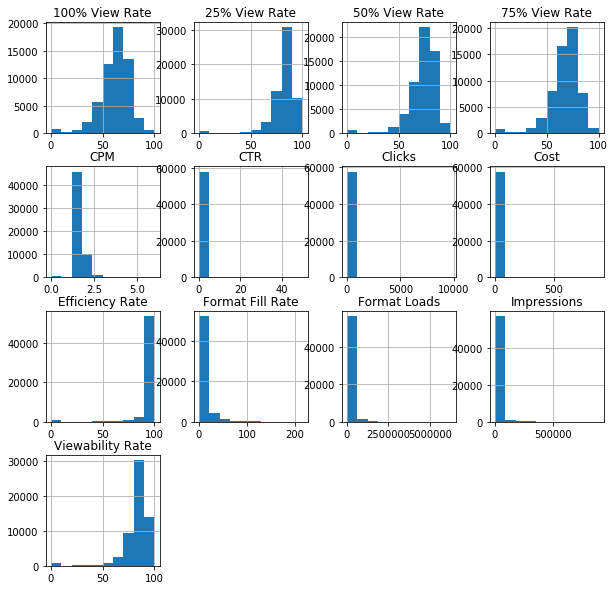

In [25]:
plt.rcParams['figure.figsize']=(10,10)
report.hist();

Reordering of the table grouping by Domain, ordered by the number of Format Loads

In [26]:
groupby_domains = report.groupby(['Domain']).agg({'Format Loads':np.sum,
                                'Impressions':np.sum,
                                'Format Fill Rate':np.mean,
                                'Viewability Rate':np.mean,
                                'Efficiency Rate':np.mean,
                                'CPM':np.mean,
                                'Cost':np.mean,
                                'Clicks':np.sum,
                                'CTR':np.sum,
                                '25% View Rate':np.mean,
                                '50% View Rate':np.mean,
                                '75% View Rate':np.mean,
                                '100% View Rate':np.mean
                                }).sort_values( by= 'Format Loads',ascending=False).reset_index()
print(groupby_domains.shape)
groupby_domains.head(20)

(1072, 14)


,Domain,Format Loads,Impressions,Format Fill Rate,Viewability Rate,Efficiency Rate,CPM,Cost,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
0,rediff.com,97496012.0,9816423,11.468696,76.979457,98.149565,1.674130,75.019861,36582,36.37,71.908587,59.999565,52.975000,47.585761
1,missyusa.com,97473418.0,6128716,7.545385,75.436538,95.649231,1.621923,348.312388,5167,2.32,73.578462,60.050769,50.964615,43.687308
2,mundopositivo.com.br,94053928.0,2171544,2.446739,69.167391,99.418261,1.812391,19.303819,352,2.09,84.740978,87.405652,85.409674,81.476522
3,chinatimes.com,87913744.0,17022099,19.283913,88.242065,99.628478,1.762065,129.135660,160360,83.92,79.241304,69.383478,62.438043,56.185978
4,correiobraziliense.com.br,77352838.0,12626361,17.077391,77.046196,99.761630,1.659674,90.970322,54502,45.22,83.972065,78.116957,73.168913,67.466413
5,record.com.mx,77032297.0,2597030,3.459130,78.972717,98.311630,1.673913,19.170567,14461,50.68,81.940761,72.612826,66.146957,60.511196
6,minuto30.com,74392564.0,2723644,3.812065,88.295217,97.986957,1.884022,21.481668,21763,74.37,86.686413,80.279565,73.969891,67.519239
7,laverdadnoticias.com,72515627.0,14720666,20.368152,86.807391,98.802391,1.592065,102.073666,258733,167.01,87.420543,82.891957,78.304565,73.296087
8,jugantor.com,67253114.0,1818818,2.800543,86.946957,98.541848,1.695435,13.195971,6239,30.41,84.667065,76.732391,70.426522,64.551413
9,cooperativa.cl,63638868.0,2898818,4.795543,81.004891,98.348043,1.544783,19.317885,32001,95.33,76.144674,65.132065,57.795217,51.657826


In [94]:
groupby_domains.groupby(['Domain','Format Fill Rate']).sum().sort_values( by= 'Format Fill Rate',ascending=False).reset_index().head(20)

,Domain,Format Fill Rate,Format Loads,Impressions,Viewability Rate,Efficiency Rate,CPM,Cost,Clicks,CTR,25% View Rate,50% View Rate,75% View Rate,100% View Rate
0,minhavida.com.br,79.453370,23184136.0,17905395,87.761522,99.956196,1.670652,189.687109,95189,50.98,86.723043,81.074674,76.777391,71.955978
1,14ymedio.com,68.612747,1554128.0,1061525,89.577582,99.326703,1.647473,7.656481,5399,40.47,87.766703,81.928132,77.385055,73.760440
2,kino-teatr.ru,63.790000,128629.0,82049,88.800000,82.560000,0.100000,0.820490,606,0.74,69.710000,54.470000,44.980000,38.050000
3,mundohispanico.com,63.057826,32670090.0,20907504,85.567609,99.251739,1.649022,151.410824,143300,69.31,86.539457,79.436413,73.602500,68.429348
4,vrum.com.br,62.179844,546467.0,333197,87.612344,99.977344,1.646250,5.823006,1238,27.71,86.780469,81.137031,76.694375,71.729219
5,anandabazar.com,60.092065,3990959.0,2282959,88.884565,99.239348,1.649783,16.329359,4131,16.94,86.558587,79.837174,74.441087,69.309565
6,sinovision.net,54.150455,1248426.0,667820,80.610227,99.984432,1.739318,8.456058,756,9.90,88.112955,81.271250,76.084318,71.111932
7,finanzmarktwelt.de,51.753478,5000256.0,2591785,89.548986,98.598261,1.525652,22.907389,13797,38.16,90.934638,84.830870,79.840580,74.641014
8,soy502.com,51.700882,388674.0,191072,89.249412,98.546471,1.674412,3.788643,1207,22.85,85.416765,77.552647,71.305882,65.525294
9,uai.com.br,49.857679,1389418.0,748577,80.274643,99.892143,1.755714,10.005332,3149,23.96,87.057857,81.797500,77.115536,71.991071


(array([702., 229.,  83.,  28.,  11.,   5.,   8.,   3.,   2.,   1.]),
 array([ 0.        ,  7.94533696, 15.89067391, 23.83601087, 31.78134783,
        39.72668478, 47.67202174, 55.6173587 , 63.56269565, 71.50803261,
        79.45336957]),
 <a list of 10 Patch objects>)

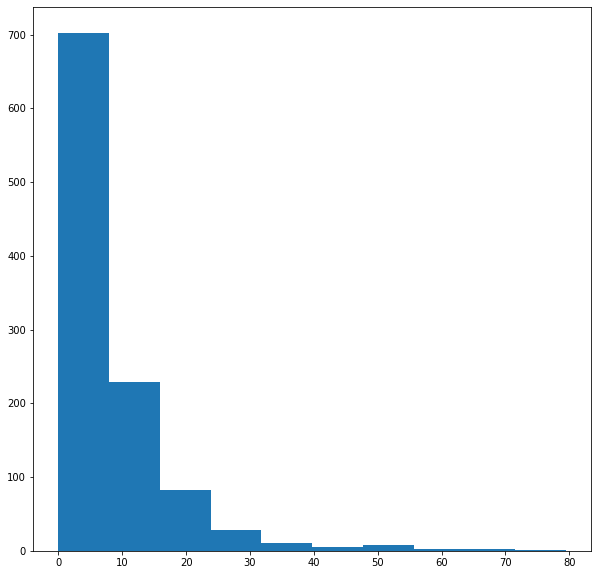

In [27]:
plt.hist(groupby_domains['Format Fill Rate'])

**We can see that around the 80% of the Domains have a Format Fill Rate percentage  between 0-15%**

